<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/apple_tomatoAlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_path = "/content/drive/MyDrive/apple-tomato/train"

In [ ]:
val_path = "/content/drive/MyDrive/apple-tomato/test"

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = data_gen.flow_from_directory(
  train_path,
  target_size=(224, 224),
  batch_size=32,
  class_mode='binary',
  shuffle=True)

Found 294 images belonging to 2 classes.


In [ ]:
val_generator = data_gen.flow_from_directory(
  val_path,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary',
  shuffle=False)

Found 97 images belonging to 2 classes.


In [ ]:
input_shape, num_classes = (224, 224, 3), 1

In [ ]:
input = Input(shape=input_shape)

x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(input)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(256, (5, 5), activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Conv2D(384, (3, 3), activation='relu')(x)
x = Conv2D(384, (3, 3), activation='relu')(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)

output_layer = Dense(num_classes, activation='sigmoid')(x)
model = Model(inputs=input, outputs=output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 384)         885120

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
fit_history = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=val_generator,
)

<ipython-input-18-6a2829a8601d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit_history = model.fit_generator(


Epoch 1/100
10/10 [==============================] - 59s 5s/step - loss: 0.6925 - accuracy: 0.5510 - precision: 0.4857 - recall: 0.2615 - val_loss: 0.6920 - val_accuracy: 0.5567 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 1s 120ms/step - loss: 0.6913 - accuracy: 0.5578 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6908 - val_accuracy: 0.5567 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 1s 108ms/step - loss: 0.6905 - accuracy: 0.5578 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6905 - val_accuracy: 0.5567 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 1s 113ms/step - loss: 0.6899 - accuracy: 0.5578 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.6895 - val_accuracy: 0.5567 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
10/10 [===========================

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


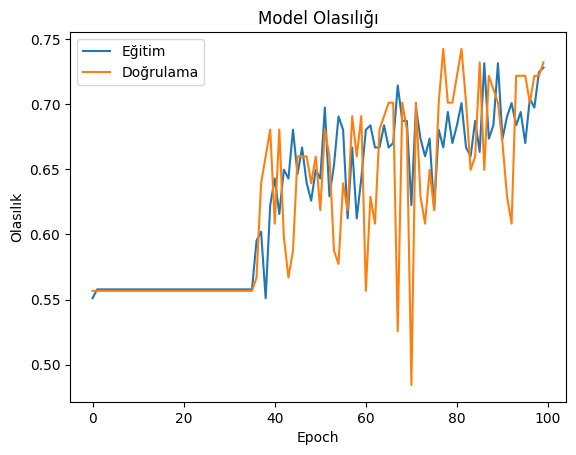

In [ ]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Olasılığı')
plt.ylabel('Olasılık')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

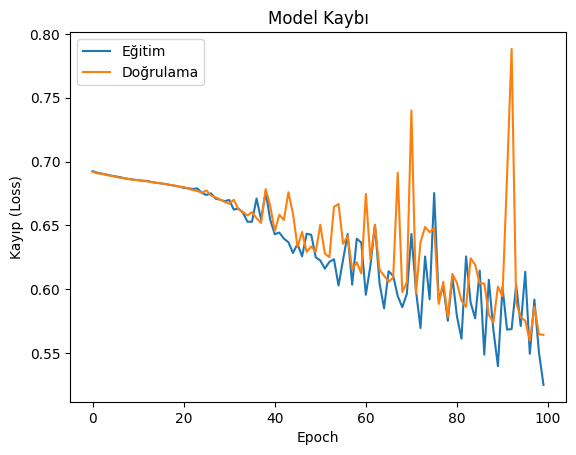

In [ ]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Kaybı')
plt.ylabel('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Doğrulama'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy, precision, recall = model.evaluate(val_generator)

7/7 [==============================] - 0s 35ms/step - loss: 0.5643 - accuracy: 0.7320 - precision: 0.6604 - recall: 0.8140


In [ ]:
F1_Skoru = ((precision * recall) / (precision + recall)) * 2
F1_Skoru

0.7291666700685802

In [ ]:
y_true = val_generator.classes
pred = model.predict(val_generator)
pred = np.argmax(pred, axis=1)

cm = confusion_matrix(y_true, pred)

7/7 [==============================] - 0s 33ms/step


In [ ]:
cm

array([[54,  0],
       [43,  0]])